In [4]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [5]:
filepath_HospitalData = "./HospitalAdmissionsData.csv";
HospitalData = pd.read_csv(filepath_HospitalData)


In [6]:
#What are the column headers or features in this dataset?
HospitalData.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [7]:
#The column headers are ID, AdmissionLengthDays, Death_1, Admission_Type, Insurace_Type, EnglishLanguage_1, 
#Religion_type, Marriage_1, Race, Dx

In [8]:
#How many features are floats, how many are integers?
HospitalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [9]:
# 1 feature is a float, 4 features are integers

In [10]:
#Which features are objects? (non-numeric variables)

#Admission_Type, Insurance_Type, Religion_Type, Race, Dx

In [11]:
#What are the possible values for insurance types?
HospitalData.Insurance_Type.unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [12]:
#The possible insurance types are private, medicare, government, medicaid, and self pay

In [13]:
# Show the summary statistics for admission length

In [14]:
HospitalData.AdmissionLengthDays.describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [15]:
#What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?

In [16]:
HospitalData.describe(include="object")

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


In [17]:
# Most common of the object types are emergency admissions, medicare insurance holders, catholics, whites, and newborns

In [18]:
#Show a histogram for admission days (with appropriate labels, titles, etc), and also show a 
#histogram for admission days on a log scale. Describe what you see.

Text(0, 0.5, 'Number of People')

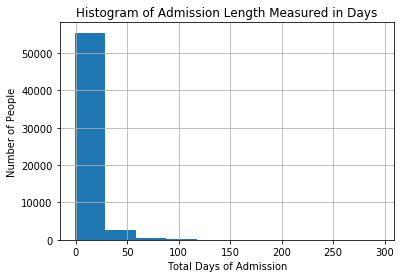

In [19]:
%matplotlib inline
HospitalData.hist(column='AdmissionLengthDays')
plt.title("Histogram of Admission Length Measured in Days")
plt.xlabel("Total Days of Admission")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

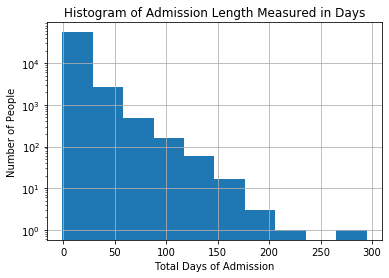

In [20]:
%matplotlib inline
HospitalData.hist(column='AdmissionLengthDays', log = 1)
plt.title("Histogram of Admission Length Measured in Days")
plt.xlabel("Total Days of Admission")
plt.ylabel("Number of People")

In [21]:
# The most people ar admitted into hospital for about 30 days. There are very few people who are admitted for days beyond
# 240. 

In [29]:
#Compare the average length of admission between those who died versus those who did not die. 
#Show a visualization, with appropriate labels, titles, etc.

Text(0, 0.5, 'Death Status (1 = Death)')

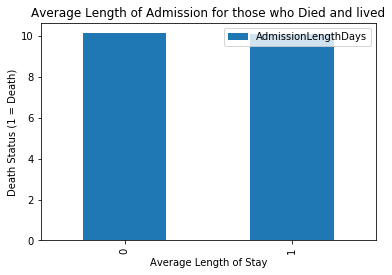

In [30]:
SurvivalBar = HospitalData.groupby("Death_1").mean()
SurvivalBar.plot.bar(y=["AdmissionLengthDays"])
plt.title("Average Length of Admission for those who Died and lived")
plt.xlabel("Average Length of Stay")
plt.ylabel("Death Status (1 = Death)")

In [31]:
#Describe the association between death and insurance type and show a visualization or test.

Insurance_Type  government  medicaid  medicare  private  self pay
Death_1                                                          
0                     1691      5400     24253    21152       515
1                       90       381      3904     1382        95


Text(0.5, 0, 'Death Status (Death = 1)')

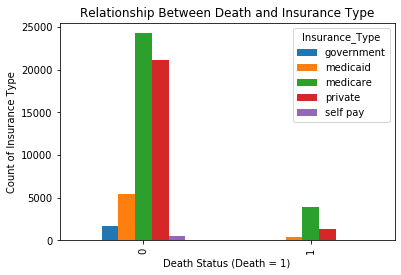

In [32]:
HospitalDeathInsurance = pd.crosstab(HospitalData.Death_1, HospitalData.Insurance_Type)
print(HospitalDeathInsurance)
HospitalDeathInsurance.plot.bar()
plt.ylabel("Count of Insurance Type")
plt.title("Relationship Between Death and Insurance Type")
plt.xlabel("Death Status (Death = 1)")

In [33]:
#The medicare holders were the ones who died in the hospital the most, followed by private insurance holders. Interestingly,
#the medicare holders also had the greatest number to survive their hospital visit, followed by private insurance holders. 

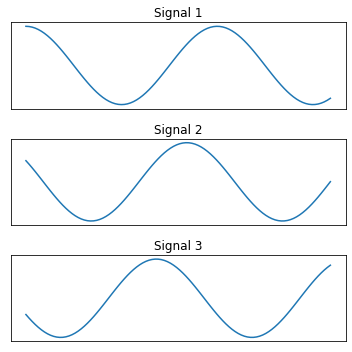

In [36]:
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (5, 5));
axes[0].set(title=names[0])
axes[0].plot(x,y1)
axes[1].set(title=names[1])
axes[1].plot(x,y2)
axes[2].set(title=names[2])
axes[2].plot(x,y3)

for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
plt.tight_layout()